In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import os
import yaml
#from dotenv import load_dotenv

import Mandelbrot
#from Mandelbrot import hurst #defined/customized functions from Mandelbrot.py

import scipy
from scipy.stats import norm, cauchy, lognorm, expon, kstest
from scipy.stats import linregress
from hurst import compute_Hc


In [2]:
MIN = Mandelbrot.process_csv(gran="min")
HOUR = Mandelbrot.process_csv(gran="hour")
DAY = Mandelbrot.process_csv(gran="day")
WEEK = Mandelbrot.process_csv(gran="week")
MONTH = Mandelbrot.process_csv(gran="month")

In [9]:
DAY.head()

,Unnamed: 0,unix,date,volume,high,low,delta_high,delta_low,timedelta
0,0,1410912000,2014-09-17,16389166.0,361.468506,351.586884,NaN,NaN,NaT
1,1,1410998400,2014-09-18,26691849.0,355.505402,319.789459,-5.963104,-31.797424,1 days
2,2,1411084800,2014-09-19,29560103.0,330.936707,298.921021,-24.568695,-20.868439,1 days
3,3,1411171200,2014-09-20,28736826.0,329.978180,303.931244,-0.958527,5.010223,1 days
4,4,1411257600,2014-09-21,20702625.0,321.504517,306.502197,-8.473663,2.570953,1 days


Data gets divided into 53 fixed windows of length 64
Data gets divided into 26 fixed windows of length 128
Data gets divided into 13 fixed windows of length 256
Data gets divided into 6 fixed windows of length 512


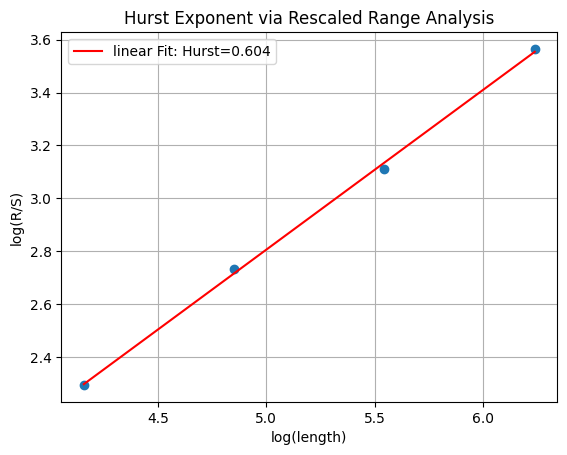

In [10]:
#rescaled range method
h_f_daily = Mandelbrot.hurst()
h_f_daily.fit(data=DAY["delta_high"], power=9, rolling_window="false")
h_f_daily.plot_fit()

Data gets divided into 690 fixed windows of length 64
Data gets divided into 345 fixed windows of length 128
Data gets divided into 172 fixed windows of length 256
Data gets divided into 86 fixed windows of length 512
Data gets divided into 43 fixed windows of length 1024
Data gets divided into 21 fixed windows of length 2048
Data gets divided into 10 fixed windows of length 4096


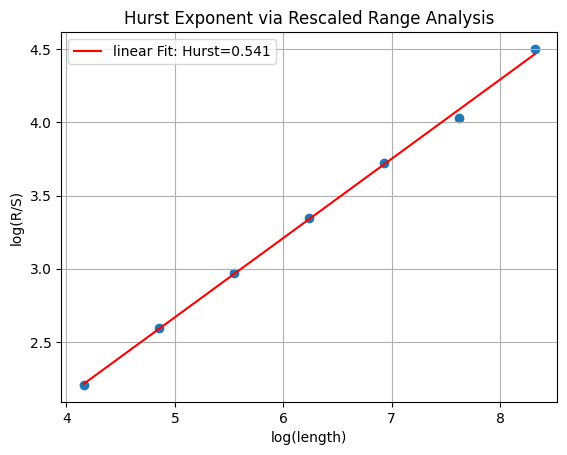

In [11]:
#rescaled range method
h_f_hour = Mandelbrot.hurst()
h_f_hour.fit(data=HOUR["delta_high"], power=12, rolling_window="false")
h_f_hour.plot_fit()

Data gets divided into 49444 fixed windows of length 64
Data gets divided into 24722 fixed windows of length 128
Data gets divided into 12361 fixed windows of length 256
Data gets divided into 6180 fixed windows of length 512
Data gets divided into 3090 fixed windows of length 1024
Data gets divided into 1545 fixed windows of length 2048
Data gets divided into 772 fixed windows of length 4096
Data gets divided into 386 fixed windows of length 8192
Data gets divided into 193 fixed windows of length 16384
Data gets divided into 96 fixed windows of length 32768


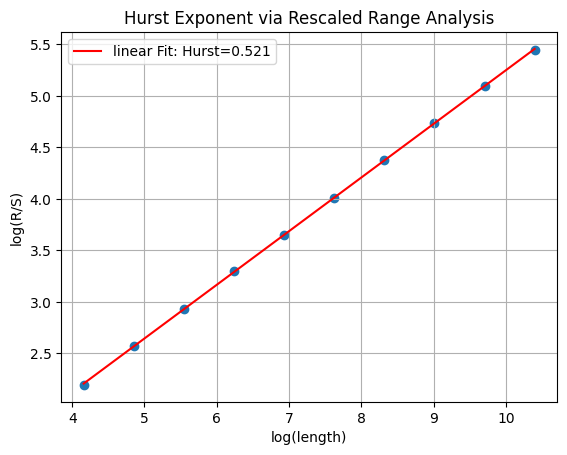

In [13]:
#rescaled range method
h_f_min = Mandelbrot.hurst()
h_f_min.fit(data=MIN["delta_high"], power=15, rolling_window="false")
h_f_min.plot_fit()

In [ ]:
#IMPORTANT : The window size does influence the H quite a lot. What is the best choice here?

How can the Hurst be used for analysis? Windows size? What trend is displayed?

| Window           | Use Case                  | Comment                                                                                     |
| ---------------- | ------------------------- | ------------------------------------------------------------------------------------------- |
| **7–14 days**    | High-frequency traders    | Noisy, very reactive, not recommended unless smoothed.                                      |
| **30–90 days**   | Swing/medium-term traders | Useful for identifying trends or reversals.                                                 |
| **180–365 days** | Long-term investors       | Good for judging longer-term persistence/momentum.                                          |
| **Full history** | Structural study          | Only useful to classify Bitcoin as an asset (e.g., is it closer to stocks or commodities?). |


In [8]:
#DFA FIT

#H = alpha -1

#DFA returs alpha >1 

In [14]:
short_term_H = []
dates_short = []

#collects alls first days per month
month_starts = pd.date_range(start = DAY["date"].min().replace(day=1),
                            end = DAY["date"].max(),
                            freq="MS")

print(month_starts)

DatetimeIndex(['2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01',
               ...
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
               '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', length=112, freq='MS')


In [18]:
end

Timestamp('2023-12-31 00:00:00')

In [19]:
for day1 in month_starts:
    end = (day1 + pd.offsets.MonthEnd(0))
    #print(day1, end)
    mask = (DAY["date"] >= day1) & (DAY["date"] <= end)
    month_data = DAY.loc[mask, "high"].values
    #print(month_data)
    
    if len(month_data) > 10:
        H, c, data = compute_Hc(month_data, kind="price", simplified=True)
        short_term_H.append(H)
        dates_short.append(end)
        
df_short_term = pd.DataFrame({"date":dates_short,
                             "H":short_term_H})

print(df_short_term)
    

ValueError: Series length must be greater or equal to 100

ValueError: Series length must be greater or equal to 100

In [28]:
h_f.rs_range

[197.06347889376977, 409.2143275932285, 799.5205793739098, 1679.4210544456382]

In [13]:
data = HOUR['high']
power = 9
l = 2 ** power  # length of each subset
n = int(len(data) / l)  # number of subsets
R_S_per_segment = []
print(power, l, n, R_S_per_segment)

9 512 86 []


In [ ]:
print(f"Data gets divided into {n} fixed windows of length {l}")
for k in range(n):
    subset = data[k * l:(k + 1) * l]
    mean = np.mean(subset)
    std = np.std(subset)
    Y_cumsum = np.cumsum(subset - mean)
    R = np.max(Y_cumsum) - np.min(Y_cumsum)
    R_S = R / std if std != 0 else 0
    R_S_per_segment.append(R_S)

In [3]:
h_f = hurst()
h_f.fit(data=HOUR["high"], power=12, rolling_window="false")
#computing error!!!

Data gets divided into 86 fixed windows of length 512
Data gets divided into 43 fixed windows of length 1024
Data gets divided into 21 fixed windows of length 2048
Data gets divided into 10 fixed windows of length 4096


1.0239973439533414

In [5]:
H, c, data = compute_Hc(HOUR["high"])
print(H)

0.5450974648527639


In [6]:
HURST = []

for dataset in [HOUR,DAY]:
    HURST.append(h_f.fit(data=dataset["high"], power=10, rolling_window="false"))
    

Data gets divided into 11044 fixed windows of length 4
Data gets divided into 5522 fixed windows of length 8
Data gets divided into 2761 fixed windows of length 16
Data gets divided into 1380 fixed windows of length 32
Data gets divided into 690 fixed windows of length 64
Data gets divided into 345 fixed windows of length 128
Data gets divided into 172 fixed windows of length 256
Data gets divided into 86 fixed windows of length 512
Data gets divided into 43 fixed windows of length 1024
Data gets divided into 848 fixed windows of length 4
Data gets divided into 424 fixed windows of length 8
Data gets divided into 212 fixed windows of length 16
Data gets divided into 106 fixed windows of length 32
Data gets divided into 53 fixed windows of length 64
Data gets divided into 26 fixed windows of length 128
Data gets divided into 13 fixed windows of length 256
Data gets divided into 6 fixed windows of length 512
Data gets divided into 3 fixed windows of length 1024


In [7]:
print(HURST)

[0.9881856137096712, 0.9723525937186174]


In [20]:
###### ANALYZE FOR OVERFITTING!!!!!!

from statsmodels.tsa.stattools import adfuller
from scipy.signal import detrend

result = adfuller(DAY["high"])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

#test for stationarity. If your series is nonstationary, the R/S analysis can give falsely high Hurst exponents
#p < 0.05 → likely stationary 
#p ≥ 0.05 → non-stationary (likely overfit Hurst)

ADF Statistic: -1.272777264382868
p-value: 0.6415329223148358


Data gets divided into 848 fixed windows of length 4
Data gets divided into 424 fixed windows of length 8
Data gets divided into 212 fixed windows of length 16
Data gets divided into 106 fixed windows of length 32
Data gets divided into 53 fixed windows of length 64
Data gets divided into 848 fixed windows of length 4
Data gets divided into 424 fixed windows of length 8
Data gets divided into 212 fixed windows of length 16
Data gets divided into 106 fixed windows of length 32
Data gets divided into 53 fixed windows of length 64


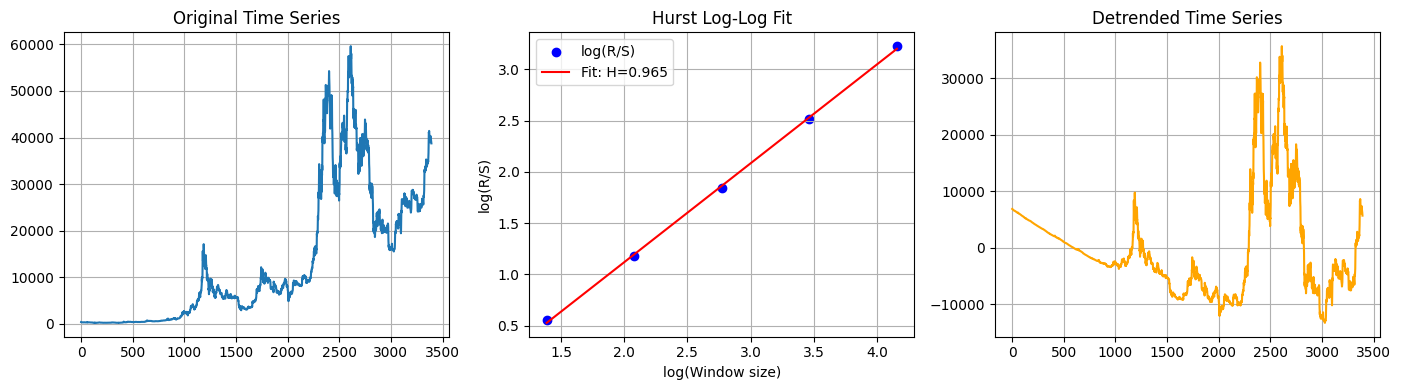

{'Original Hurst': 0.964882172836033,
 'Detrended Hurst': 0.978516430621951,
 'ADF Statistic': -1.272777264382868,
 'ADF p-value': 0.6415329223148358,
 'ADF Critical Values': {'1%': -3.4322948129049493,
  '5%': -2.8623993051360332,
  '10%': -2.5672274248944094}}

In [23]:
run_hurst_diagnostics(DAY["high"], max_power=6)

In [22]:
def run_hurst_diagnostics(data, max_power=6):
    h = hurst()
    hurst_val = h.fit(data, power=max_power)

    # ADF Test
    adf_stat, p_value, _, _, critical_values, _ = adfuller(data)

    # Detrend and re-calculate Hurst
    detrended_data = detrend(data)
    h_detrended = hurst()
    hurst_detrended = h_detrended.fit(detrended_data, power=max_power)

    # Plot original time series
    plt.figure(figsize=(14, 4))
    plt.subplot(1, 3, 1)
    plt.plot(data, label="Original Time Series")
    plt.title("Original Time Series")
    plt.grid(True)

    # Plot log(R/S) vs log(L)
    plt.subplot(1, 3, 2)
    plt.scatter(np.log(h.subset_length), np.log(h.rs_range), label='log(R/S)', color='blue')
    plt.plot(np.log(h.subset_length), h.Y, label=f'Fit: H={h.hurst:.3f}', color='red')
    plt.xlabel('log(Window size)')
    plt.ylabel('log(R/S)')
    plt.title("Hurst Log-Log Fit")
    plt.legend()
    plt.grid(True)

    # Plot detrended time series
    plt.subplot(1, 3, 3)
    plt.plot(detrended_data, label="Detrended Series", color='orange')
    plt.title("Detrended Time Series")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return {
        "Original Hurst": h.hurst,
        "Detrended Hurst": hurst_detrended,
        "ADF Statistic": adf_stat,
        "ADF p-value": p_value,
        "ADF Critical Values": critical_values
    }


In [29]:
class Hurst:
    def __init__(self):
        self.hurst = None
        self.Y = None
        self.linfit = None
        self.rs_range = None
        self.subset_length = None

    def rescaled_range(self, data, power, rolling_window="false"):
        l = 2 ** power  # length of each subset
        n = int(len(data) / l)  # number of subsets
        R_S_per_segment = []

        if rolling_window == "true":
            print(f"Data gets divided into {len(data) - l + 1} rolling windows of length {l}")
            for k in range(l, len(data) + 1):
                subset = data[k - l:k]
                mean = np.mean(subset)
                std = np.std(subset)
                Y_cumsum = np.cumsum(subset - mean)
                R = np.max(Y_cumsum) - np.min(Y_cumsum)
                R_S = R / std if std != 0 else 0
                R_S_per_segment.append(R_S)
        else:
            print(f"Data gets divided into {n} fixed windows of length {l}")
            for k in range(n):
                subset = data[k * l:(k + 1) * l]
                mean = np.mean(subset)
                std = np.std(subset)
                Y_cumsum = np.cumsum(subset - mean)
                R = np.max(Y_cumsum) - np.min(Y_cumsum)
                R_S = R / std if std != 0 else 0
                R_S_per_segment.append(R_S)

        R_S_mean = np.mean(R_S_per_segment)
        return R_S_mean, l

    def fit(self, data, power, rolling_window="false"):
        L = []
        R_S_mean_list = []
        
        #loop through different lengths relating to the base 2
        for p in range(2, power + 1):
            r_s_mean, l = self.rescaled_range(data=data, power=p, rolling_window=rolling_window)
            L.append(l)
            R_S_mean_list.append(r_s_mean)

        #fit linear regression
        slope, intercept, r_value, p_value, std_err = linregress(np.log(L), np.log(R_S_mean_list))

        #reconstruct fitted values
        Y = [slope * np.log(l) + intercept for l in L]

        #store values in the instance
        self.hurst = slope
        self.Y = Y
        self.linfit = [slope, intercept, p_value]
        self.rs_range = R_S_mean_list
        self.subset_length = L

        return slope  #hurst
    
    def plot_fit(self):
        plt.scatter(np.log(self.subset_length),np.log(self.rs_range))
        plt.plot(np.log(self.subset_length), self.Y, label=f'linear Fit: Hurst={self.linfit[0]:.3f}', color='red')
        #plt.text(x=0.9,y=0.1,s=f"Y={H}*x+{fit[1]}")
        plt.ylabel("log(R/S)")
        plt.xlabel("log(length)")
        plt.title('Hurst Exponent via Rescaled Range Analysis')
        plt.legend()
        plt.grid(True)
        plt.show()
        
        
        

In [30]:
h_f = Hurst()
h_f.fit(data=HOUR["high"], power=10, rolling_window="false")

Data gets divided into 11044 fixed windows of length 4
Data gets divided into 5522 fixed windows of length 8
Data gets divided into 2761 fixed windows of length 16
Data gets divided into 1380 fixed windows of length 32
Data gets divided into 690 fixed windows of length 64
Data gets divided into 345 fixed windows of length 128
Data gets divided into 172 fixed windows of length 256
Data gets divided into 86 fixed windows of length 512
Data gets divided into 43 fixed windows of length 1024


0.9881856137096712

In [19]:
h_r = Hurst()
h_r.fit(data=DAY["high"], power=10, rolling_window="true")

Data gets divided into 3390 rolling windows of length 4
Data gets divided into 3386 rolling windows of length 8
Data gets divided into 3378 rolling windows of length 16
Data gets divided into 3362 rolling windows of length 32
Data gets divided into 3330 rolling windows of length 64
Data gets divided into 3266 rolling windows of length 128
Data gets divided into 3138 rolling windows of length 256
Data gets divided into 2882 rolling windows of length 512
Data gets divided into 2370 rolling windows of length 1024


0.9807773235598388

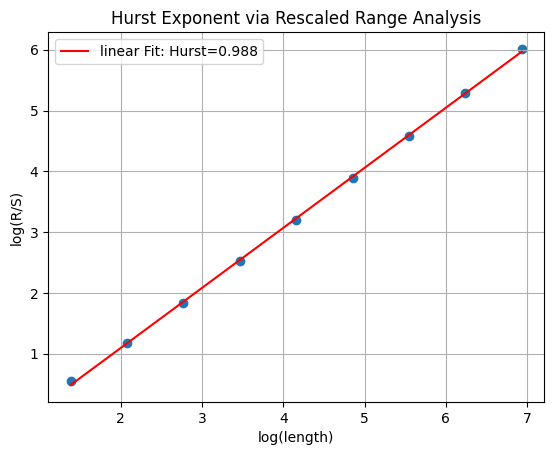

In [31]:
window_sizes = [2**i for i in range(2, 10)]  # [4, 8, ..., 512]


In [29]:
def compute_rs(data, window):
    n = len(data)
    num_chunks = n // window
    rs_values = []

    for i in range(num_chunks):
        chunk = data[i*window : (i+1)*window]
        mean = np.mean(chunk)
        dev = chunk - mean
        cumdev = np.cumsum(dev)
        R = np.max(cumdev) - np.min(cumdev)
        S = np.std(chunk, ddof=1)
        if S == 0:
            continue  # skip flat segments
        rs = R / S
        rs_values.append(rs)

    return np.mean(rs_values) if rs_values else None


In [37]:
data = random_walk
log_rs = []
log_n = []

for w in window_sizes:
    rs = compute_rs(data, w)
    if rs is not None:
        log_rs.append(np.log(rs))
        log_n.append(np.log(w))


In [38]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(log_n, log_rs)
hurst_exp = slope


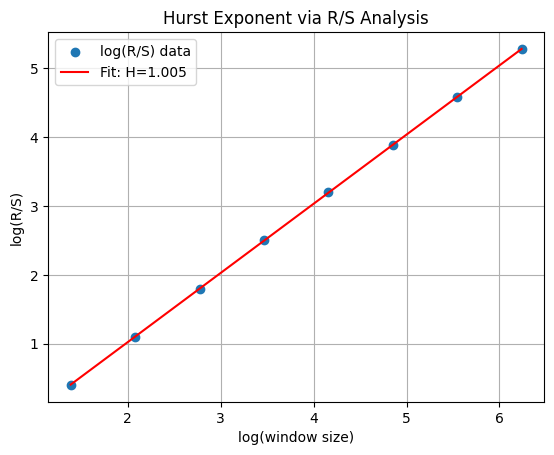

In [35]:
import matplotlib.pyplot as plt

plt.scatter(log_n, log_rs, label="log(R/S) data")
plt.plot(log_n, [slope * x + intercept for x in log_n], color='red', label=f"Fit: H={hurst_exp:.3f}")
plt.xlabel("log(window size)")
plt.ylabel("log(R/S)")
plt.legend()
plt.title("Hurst Exponent via R/S Analysis")
plt.grid(True)
plt.show()


In [36]:
np.random.seed(42)
random_walk = np.cumsum(np.random.randn(1024))
# Expect H ≈ 0.5


In [39]:
print(hurst_exp)

1.0195317429680348


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

def compute_rs(data, window):
    n = len(data)
    num_chunks = n // window
    rs_values = []

    for i in range(num_chunks):
        chunk = data[i*window : (i+1)*window]
        if len(chunk) < window:
            continue

        mean = np.mean(chunk)
        dev = chunk - mean
        cumdev = np.cumsum(dev)
        R = np.max(cumdev) - np.min(cumdev)
        S = np.std(chunk, ddof=1)

        if S == 0:
            continue

        rs_values.append(R / S)

    if len(rs_values) == 0:
        return None
    return np.mean(rs_values)

def hurst_exponent_rs(data, min_window_exp=2, max_window_exp=8):
    log_rs = []
    log_n = []
    
    for exp in range(min_window_exp, max_window_exp + 1):
        w = 2 ** exp
        if len(data) // w < 4:
            continue  # skip windows with too few segments

        rs = compute_rs(data, w)
        if rs and rs > 0:
            log_rs.append(np.log(rs))
            log_n.append(np.log(w))

    slope, intercept, r_value, p_value, std_err = linregress(log_n, log_rs)

    # Plot
    plt.scatter(log_n, log_rs, label="log(R/S)")
    plt.plot(log_n, [slope * x + intercept for x in log_n], color='red', label=f"H = {slope:.3f}")
    plt.xlabel("log(window size)")
    plt.ylabel("log(R/S)")
    plt.title("Hurst Exponent via Rescaled Range")
    plt.legend()
    plt.grid(True)
    plt.show()

    return slope  # This is the Hurst exponent


In [42]:
print(data)

[ 0.49671415  0.35844985  1.00613839 ... 27.95772135 27.93336676
 30.07563712]


In [7]:
def hurst_exponent_rs(data, min_exp=2, max_exp=9):
    window_sizes = [2**i for i in range(min_exp, max_exp + 1)]
    log_rs = []
    log_n = []

    print("Window size | #chunks | Mean R/S")
    for w in window_sizes:
        chunks = len(data) // w
        if chunks < 4:
            continue  # too few segments

        rs = compute_rs(data, w)
        if rs and rs > 0:
            print(f"{w:<12} {chunks:<8} {rs:.4f}")
            log_rs.append(np.log(rs))
            log_n.append(np.log(w))

    slope, intercept, r_value, p_value, std_err = linregress(log_n, log_rs)

    plt.scatter(log_n, log_rs, label="log(R/S)")
    plt.plot(log_n, [slope * x + intercept for x in log_n], color='red', label=f"H = {slope:.3f}")
    plt.xlabel("log(window size)")
    plt.ylabel("log(R/S)")
    plt.title("Hurst Exponent via Rescaled Range")
    plt.legend()
    plt.grid(True)
    plt.show()

    return slope


Window size | #chunks | Mean R/S
4            256      1.4665
8            128      2.8878
16           64       5.9302
32           32       11.9885
64           16       24.4306
128          8        47.8271
256          4        95.5826


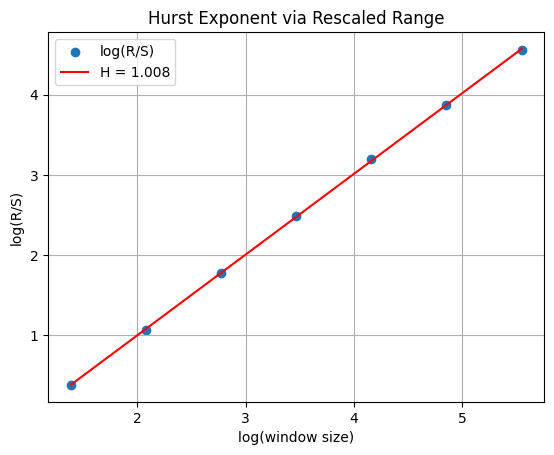

Hurst exponent: 1.008


(0.5136302195944994,
 1.3279329735805738,
 [[10, 17, 31, 56, 100, 177, 316, 562, 1000, 1024],
  [4.061473088160653,
   5.652519719458102,
   8.065037995129925,
   10.731869030840217,
   14.812115947518276,
   18.383427961838446,
   29.027480771399425,
   29.965669976918274,
   45.17547995370037,
   47.74771708184357]])

In [9]:
np.random.seed(42)
random_walk = np.cumsum(np.random.randn(1024))
# Expect H ≈ 0.5



H = hurst_exponent_rs(random_walk)
print(f"Hurst exponent: {H:.3f}")

compute_Hc(random_walk)

In [19]:
data = np.cumsum(np.random.randn(1024))  # random walk

In [20]:
def compute_rs_fixed(data, window):
    n = len(data)
    num_chunks = n // window
    rs_values = []

    for i in range(num_chunks):
        chunk = data[i*window : (i+1)*window]
        if len(chunk) < window:
            continue

        # Directly use chunk if it's already a cumulative process (random walk)
        # Step 1: de-mean
        dev = chunk - np.mean(chunk)

        # Step 2: cumulative sum of deviations
        # ONLY do this if the data is stationary (white noise)
        cum_dev = np.cumsum(dev)  # REMOVE THIS for random walk

        # For a random walk, just use the raw chunk
        # R = max - min
        R = np.max(chunk) - np.min(chunk)  # instead of cum_dev
        S = np.std(chunk, ddof=1)

        if S == 0:
            continue

        rs_values.append(R / S)

    return np.mean(rs_values) if rs_values else None


In [21]:
def compute_rs(data, window, already_integrated=False):
    n = len(data)
    num_chunks = n // window
    rs_values = []

    for i in range(num_chunks):
        chunk = data[i*window : (i+1)*window]
        if len(chunk) < window:
            continue

        mean = np.mean(chunk)
        dev = chunk - mean

        if not already_integrated:
            dev = np.cumsum(dev)

        R = np.max(dev) - np.min(dev)
        S = np.std(chunk, ddof=1)

        if S == 0:
            continue

        rs_values.append(R / S)

    return np.mean(rs_values) if rs_values else None


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

def compute_rs(chunk):
    mean = np.mean(chunk)
    dev = chunk - mean
    cum_dev = np.cumsum(dev)
    R = np.max(cum_dev) - np.min(cum_dev)
    S = np.std(chunk, ddof=1)
    return R / S if S != 0 else None

def hurst_exponent_rs(data, min_exp=2, max_exp=9, min_chunks=4):
    log_rs = []
    log_n = []

    for exp in range(min_exp, max_exp + 1):
        window = 2 ** exp
        num_chunks = len(data) // window
        if num_chunks < min_chunks:
            continue

        rs_values = []
        for i in range(num_chunks):
            chunk = data[i*window : (i+1)*window]
            rs = compute_rs(chunk)
            if rs is not None:
                rs_values.append(rs)

        if len(rs_values) == 0:
            continue

        rs_mean = np.mean(rs_values)
        log_rs.append(np.log(rs_mean))
        log_n.append(np.log(window))

    if len(log_n) < 2:
        raise ValueError("Not enough valid R/S points to compute Hurst exponent.")

    slope, intercept, r_value, p_value, std_err = linregress(log_n, log_rs)

    # Plot
    plt.scatter(log_n, log_rs, label="log(R/S)")
    plt.plot(log_n, [slope * x + intercept for x in log_n], color='red', label=f"H = {slope:.3f}")
    plt.xlabel("log(window size)")
    plt.ylabel("log(R/S)")
    plt.title("Hurst Exponent via Rescaled Range")
    plt.legend()
    plt.grid(True)
    plt.show()

    return slope


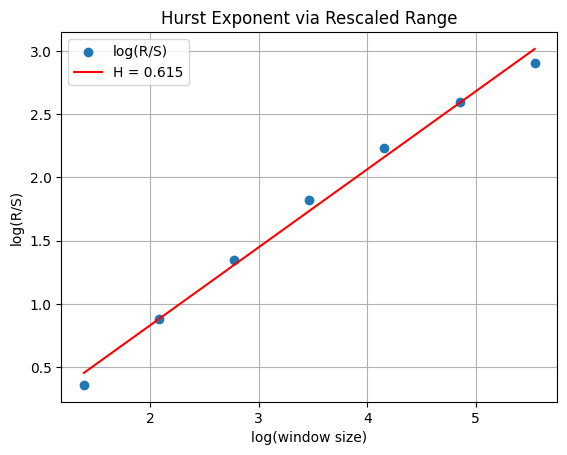

Hurst exponent (white noise): 0.615


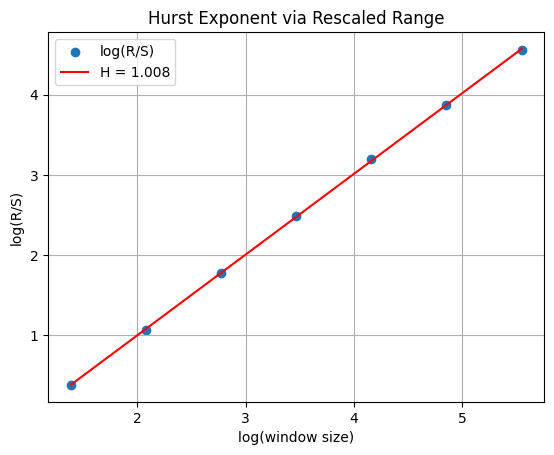

Hurst exponent (random walk): 1.008


In [32]:
np.random.seed(42)
white_noise = np.random.randn(1024)
H = hurst_exponent_rs(white_noise)
print(f"Hurst exponent (white noise): {H:.3f}")  # Expect ≈ 0.5

np.random.seed(42)
random_walk = np.cumsum(np.random.randn(1024))
H = hurst_exponent_rs(random_walk)
print(f"Hurst exponent (random walk): {H:.3f}")  # Expect ≈ 0.5



Window size | #chunks | Mean R/S
4            11044    1.4940
8            5522     3.0130
16           2761     6.0384
32           1380     12.2289
64           690      24.4767
128          345      49.1008
256          172      97.3841
512          86       196.8709


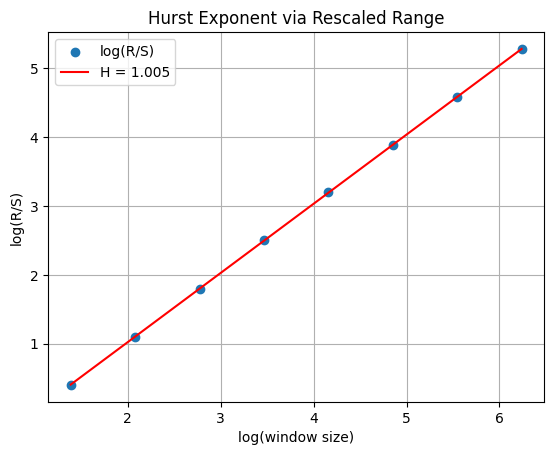

1.0052015740663456


In [23]:
H = hurst_exponent_rs(data=HOUR["high"])
print(H)